## **2. Análisis Exploratorio de los Datos de Personas Enfermas del Corazón**
Andrea Mirelle Peralta Ogaz     329516


    Lea el archivo utilizando la librería pandas. 
    Verifique si los datos no cuentan con valores NaN. Si existen valores NaN elimine los las filas correspondientes.
    Busque duplicados en los datos. Si existen elimínalos del conjunto.
    Realice 5 gráficas que crea convenientes (histograma, plot, scatterplot, boxplot, etc.) sobre este conjunto de datos y analice los resultados.
    Calcule la matriz de correlaciones de Pearson e identifique variables altamente correlacionadas. Concluya.
    Escriba al menos 5 observaciones importantes sobre estas cinco gráficas generadas.
    Concluya sobre el conjunto de datos analizado.

El documento deberá ser exportado de Google Colab utilizando el formato ipynb.  Coloque su nombre completo en un bloque de texto al principio, así como un título pertinente. Si utiliza alguna fuente externa agréguela al final en formato IEEE.  Las faltas de ortografía quitarán de su calificación una décima.

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **1. Lectura del archivo utilizando la librería pandas.**

In [218]:
archivo_csv = '/Users/andrea.peralta/Desktop/Curso Opción Tesis/2. Análisis Exploratorio/heart.csv'

df = pd.read_csv(archivo_csv)

### **2. Verificación de los datos que no cuentan con valores (NaN) y eliminación si existen.**
Utilizando el método **isnull()** acompañado del método **sum()** se contaron los datos los datos que no cuentan con valores y se verificó que no existen columnas que contengan datos con estas características.

In [68]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Aún con esta información se utilizó el método **dropna()** el cuál:

Hace una búsqueda de valores nulos, y se procede a eliminar todas las filas que contienen al menos uno del DataFrame.

In [69]:
if df.isnull().values.any():
    df = df.dropna()

### **3.Búsqueda de duplicados en los datos y eliminación si existen.**
A continuación, se implementó una función para contar duplicados en cada columna del DataFrame:
Esta función utiliza el método **duplicated()** de Pandas, que devuelve una Serie de valores booleanos indicando si cada fila es un duplicado de otra fila anterior. Luego, **sum()** se utiliza para contar la cantidad total de duplicados en cada columna.

In [72]:
duplicados_por_columna = df.duplicated().sum()

print(duplicados_por_columna)

0


Aún con esta información se utilizó **drop_duplicates()** en donde:

Se hace una búsqueda de valores duplicados y se procede a eliminar las filas que contienen datos duplicados.

In [73]:
df = df.drop_duplicates()

### **4. Generación de 5 gráficas relevantes.**

Para facilitar este proceso se procedió a hacer la transformación de variables categóricas en variables numéricas para algunas columnas específicas del DataFrame. Esta transformación es comúnmente conocida como "mapeo" **df[ ].map( )**. 

In [219]:
df["Sex"] = df["Sex"].map({'M': 0, 'F': 1})
df["ChestPainType"] = df["ChestPainType"].map({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})
df["RestingECG"] = df["RestingECG"].map({'Normal': 0, 'LVH': 1, 'ST': 2})
df["ExerciseAngina"] = df["ExerciseAngina"].map({'N': 0, 'Y': 1})
df["ST_Slope"] = df["ST_Slope"].map({'Up': 0, 'Flat': 1, 'Down': 2})

Y se verificó que el precedimiento haya sido efectivo:

In [220]:
print(df)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              1        140          289          0           0   
1     49    1              2        160          180          0           0   
2     37    0              1        130          283          0           2   
3     48    1              3        138          214          0           0   
4     54    0              2        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              0        110          264          0           0   
914   68    0              3        144          193          1           0   
915   57    0              3        130          131          0           0   
916   57    1              1        130          236          0           1   
917   38    0              2        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

#### **4.1 Histograma: Distribución de la variable de salida (HeartDisease) de acuerdo a la Edad (Age).**
Se realizó un histograma que muestra la distribución de **Edades (Age)** para ambos valores de salida de **Enfermedad Cardiaca (HeartDisease)** [1:Diagnóstico Positivo, 0:Diagnóstico Negativo], permitiendo comparar visualmente la relación entre la edad y la presencia de enfermedad cardíaca.

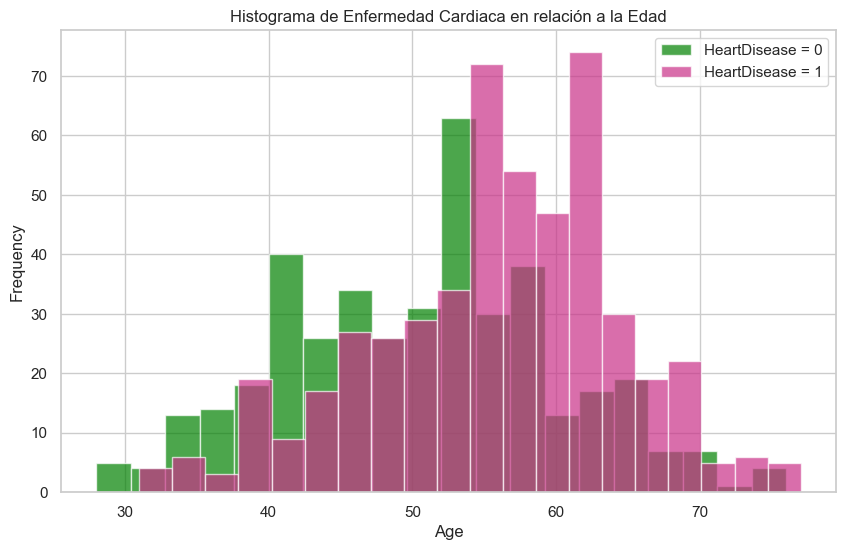

In [148]:
plt.figure(figsize=(10, 6))

plt.hist(df[df['HeartDisease'] == 0]['Age'], bins=20, color='green', alpha=0.7, label='HeartDisease = 0')

plt.hist(df[df['HeartDisease'] == 1]['Age'], bins=20, color='#c93188', alpha=0.7, label='HeartDisease = 1')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histograma de Enfermedad Cardiaca en relación a la Edad')
plt.legend()

plt.show()

Podemos observar que a partir de aproximadamente los 55 años, la cantidad de personas que presentan enfermedades cardíacas es significativamente mayor que aquellas que no las padecen en la misma franja de edad. Este patrón sugiere una posible asociación entre la edad y la incidencia de enfermedades cardíacas, indicando que a medida que las personas envejecen, la probabilidad de desarrollar problemas cardíacos tiende a aumentar.

#### **4.2 Gráfico de Disperción: Relación entre la edad (Age) y la frecuencia cardíaca máxima alcanzada (MaxHR).**

Un gráfico de dispersión que muestra la relación entre la **Edad (Age)** y la **Frecuencia Cardíaca Máxima Alcanzada (MaxHR)**. Esto también podría revelar patrones relacionados con la edad y la salud cardiovascular.

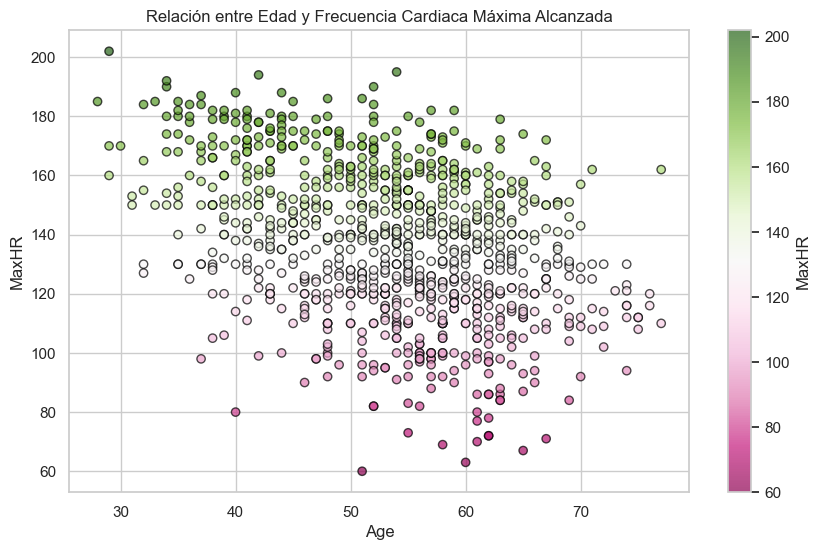

In [149]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df['Age'], df['MaxHR'], c=df['MaxHR'], cmap='PiYG', edgecolors='black', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Relación entre Edad y Frecuencia Cardiaca Máxima Alcanzada')

cbar = plt.colorbar(scatter)
cbar.set_label('MaxHR')

plt.show()


En el gráfico de dispersión, se aprecia una tendencia donde, a medida que la edad aumenta, la frecuencia cardíaca máxima tiende a concentrarse en rangos más bajos. Este fenómeno sugiere que a medida que las personas envejecen, es posible que experimenten una disminución en la frecuencia cardíaca máxima que pueden alcanzar durante actividades físicas.

#### **4.3 Boxplot: Distribución del colesterol (Cholesterol) según el tipo de dolor torácico (ChestPainType):**
Boxplot que muestra la distribución del **Colesterol (Cholesterol)** para cada **Tipo de Dolor Torácico (ChestPainType)** [0. TA: Angina Típica, 1. ATA: Angina Atípica, 2. NAP: Dolor No Anginal, 3. ASY: Asintomático]. Esto podría proporcionar información sobre cómo diferentes tipos de dolor torácico se relacionan con los niveles de colesterol.

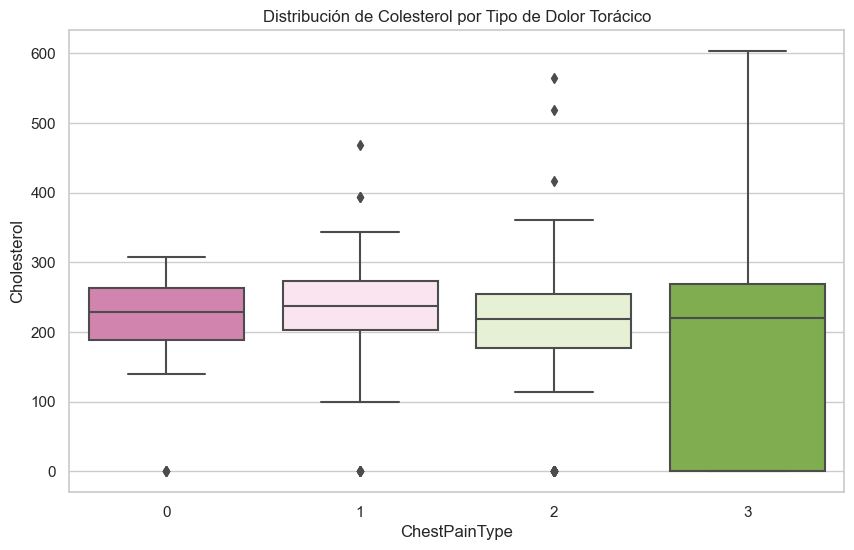

In [150]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='ChestPainType', y='Cholesterol', data=df, palette='PiYG')

plt.xlabel('ChestPainType')
plt.ylabel('Cholesterol')
plt.title('Distribución de Colesterol por Tipo de Dolor Torácico')

plt.show()

Al analizar las diferentes categorías de dolor torácico:

1. **Dolor Torácico 0 (TA - Angina Típica):**
   - La mayoría de los usuarios muestran niveles de colesterol concentrados en el rango aproximado de 190 a 270.
   - El 100% de los usuarios tienen niveles de colesterol dentro del rango aproximado de 130 a 300.

2. **Dolor Torácico 1 (ATA - Angina Atípica):**
   - La mayoría de los usuarios presentan niveles de colesterol concentrados en el rango aproximado de 200 a 280.
   - Casi el 100% de los usuarios tienen niveles de colesterol dentro del rango aproximado de 100 a 350.

3. **Dolor Torácico 2 (NAP - Dolor No Anginal):**
   - La mayoría de los usuarios exhiben niveles de colesterol concentrados en el rango aproximado de 180 a 260.
   - Casi el 100% de los usuarios tienen niveles de colesterol dentro del rango aproximado de 110 a 370.

4. **Dolor Torácico 3 (ASY - Asintomático):**
   - La mayoría de los usuarios presentan niveles de colesterol concentrados en el rango aproximado de 0 a 280.
   - El 100% de los usuarios tienen niveles de colesterol dentro del rango aproximado de 0 a 600.

Estas observaciones proporcionan información detallada sobre la distribución del colesterol en relación con los diferentes tipos de dolor torácico. Por ejemplo:

1. **Relación Entre Tipo de Dolor Torácico y Niveles de Colesterol:**
   - Existe una variación notoria en los niveles de colesterol según el tipo de dolor torácico, lo que sugiere una posible asociación entre estos dos factores.

2. **Patrones de Colesterol por Tipo de Dolor Torácico:**
   - Cada categoría de dolor torácico muestra patrones específicos en la distribución de los niveles de colesterol.
   - Por ejemplo, el tipo de dolor torácico "Angina Típica" (TA) tiende a concentrarse en niveles de colesterol entre 190 y 270, mientras que el tipo "Asintomático" (ASY) muestra una distribución más dispersa.

#### **4.4 Gráfico de Línea Polar: Comparación de las características de pacientes con y sin enfermedad cardiaca (HeartDisease).**
Este gráfico de línea polar muestra la comparación de las características promedio entre pacientes con (1) y sin (0) **Enfermedad Cardidaca (HeartDisease)**. Cada línea en el gráfico representa una categoría de características, y la posición del marcador en la línea indica el valor promedio de esa característica para cada grupo.

In [212]:
archivo_csv = '/Users/andrea.peralta/Desktop/Curso Opción Tesis/2. Análisis Exploratorio/heart.csv'

df = pd.read_csv(archivo_csv)

Para mejorar la interpretación de este gráfico en particular, fue necesario realizar un mapeo adicional para transformar las variables numéricas previas en categorías que facilitaran la visualización de los patrones en este formato específico.

In [213]:
df["Sex"] = df["Sex"].map({'M': 100, 'F': 200})
df["ChestPainType"] = df["ChestPainType"].map({'TA': 50, 'ATA': 100, 'NAP': 150, 'ASY': 200})
df["RestingECG"] = df["RestingECG"].map({'Normal': 50, 'LVH': 100, 'ST': 150})
df["ExerciseAngina"] = df["ExerciseAngina"].map({'N': 100, 'Y': 200})
df["ST_Slope"] = df["ST_Slope"].map({'Up': 50, 'Flat': 150, 'Down': 200})
df["FastingBS"] = df["FastingBS"].map({0: 100, 1: 200})
df["HeartDisease"] = df["HeartDisease"].map({0: 100, 1: 200})
df["Oldpeak"] = (df["Oldpeak"] * 100).astype(int)

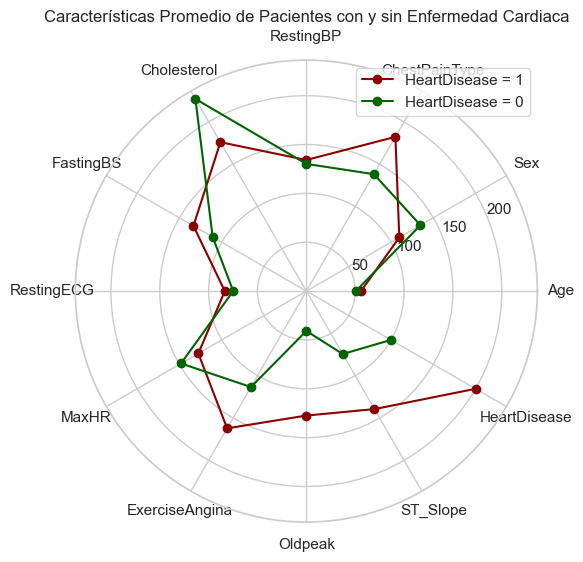

In [217]:
# Filtrar el DataFrame para pacientes con y sin HeartDisease
df_con_heart_disease = df[df['HeartDisease'] == 200].mean()
df_sin_heart_disease = df[df['HeartDisease'] == 100].mean()

# Crear el gráfico de línea polar con la paleta PiYG
theta = np.arange(len(df.columns)) * (2*np.pi) / len(df.columns)
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Línea para pacientes con HeartDisease
ax.plot(theta, df_con_heart_disease, label='HeartDisease = 1', marker='o', color='darkred')

# Línea para pacientes sin HeartDisease
ax.plot(theta, df_sin_heart_disease, label='HeartDisease = 0', marker='o', color='darkgreen')

# Configurar leyenda y título
ax.set_thetagrids(theta * 180/np.pi, df.columns)
ax.legend(loc='upper right')
ax.set_title('Características Promedio de Pacientes con y sin Enfermedad Cardiaca')

# Mostrar la visualización
plt.show()

Al analizar el gráfico, se observa que la mayoría de los pacientes con enfermedad cardiaca positiva presentan las siguientes características prominentes:
- Son mayormente hombres.
- Experimentan un tipo de dolor torácico clasificado como 'NAP' o 'ASY' (Dolor No Anginal o Asintomático).
- Tienen una presión arterial en reposo (restingbp) en el rango de 130 a 150.
- El nivel de colesterol es, en promedio, alrededor de 170.
- Muestran resultados positivos en la prueba de azúcar en sangre en ayunas (FastingBS).
- Los resultados del electrocardiograma en reposo (RestingECG) indican hipertrofia ventricular izquierda (LVH).
- La frecuencia cardíaca máxima alcanzada (MaxHR) se sitúa alrededor de 130.
- Experimentan angina inducida por el ejercicio (ExerciseAngina) de manera positiva.
- La depresión del segmento (Oldpeak) tiene un promedio de 1.3.
- La pendiente del segmento ST durante el pico ejercicio (ST_Slope) se caracteriza mayormente como 'Flat'.

Estas observaciones proporcionan una visión detallada de las características promedio que tienden a estar presentes en pacientes con enfermedad cardiaca positiva en comparación con aquellos sin enfermedad cardiaca.


#### **4.5 Gráficos de Barras: Distribución de Angina Inducida (ExerciseAngina), Pendiente del Segmento ST (ST_Slope), Tipo de Dolor Torácico (ChestPainType) y Electrocardiograma en Reposo (RestingECG).**
Estos gráficos de barras ofrecen una representación visual clara de la frecuencia de diferentes categorías en cada variable, lo que permite una comprensión más profunda de la distribución de las características en el conjunto de datos.

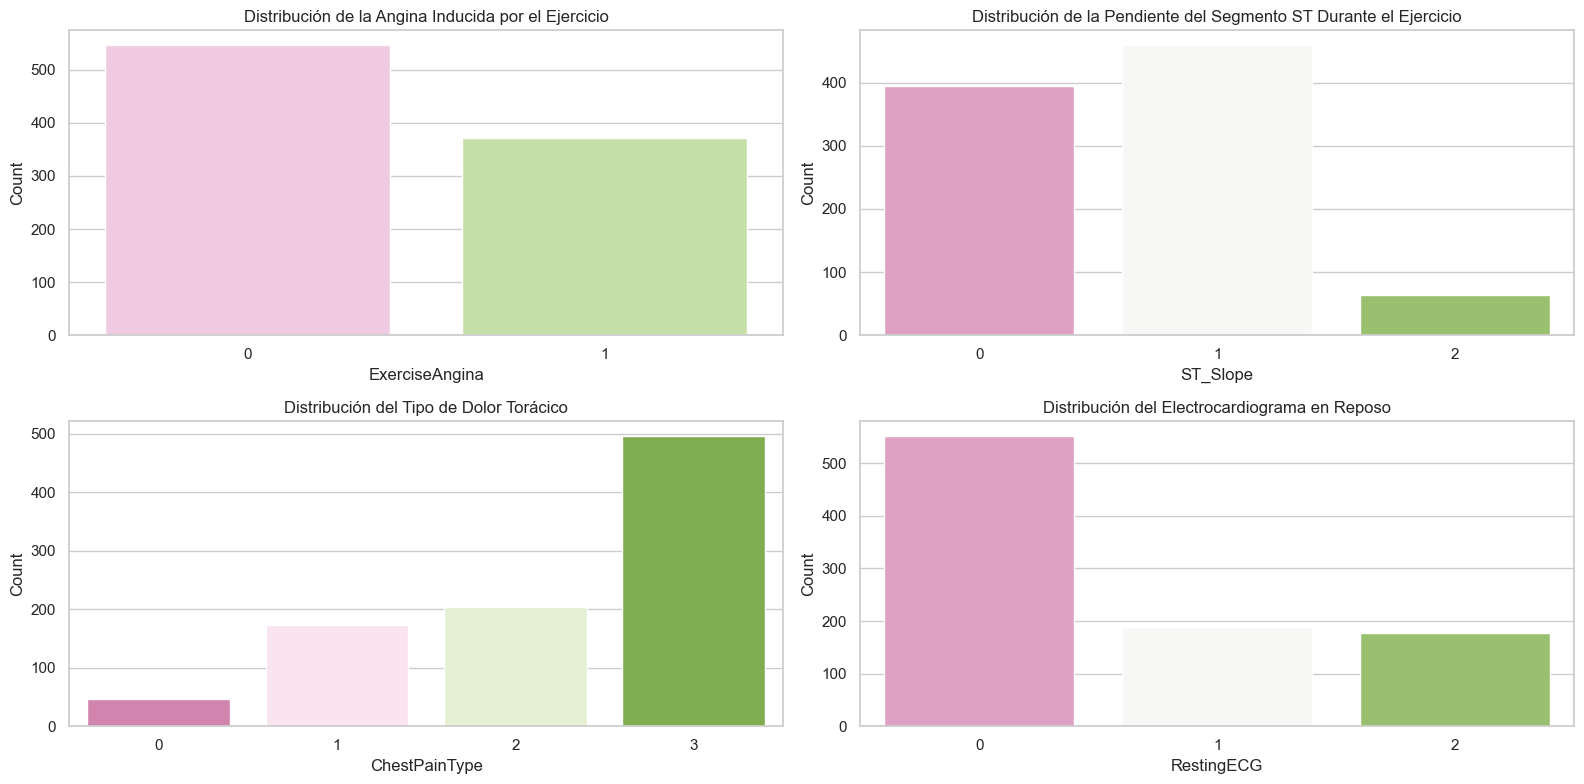

In [151]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='ExerciseAngina', data=df, palette='PiYG')
plt.title('Distribución de la Angina Inducida por el Ejercicio')
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(x='ST_Slope', data=df, palette='PiYG')
plt.title('Distribución de la Pendiente del Segmento ST Durante el Ejercicio')
plt.xlabel('ST_Slope')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(x='ChestPainType', data=df, palette='PiYG')
plt.title('Distribución del Tipo de Dolor Torácico')
plt.xlabel('ChestPainType')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(x='RestingECG', data=df, palette='PiYG')
plt.title('Distribución del Electrocardiograma en Reposo')
plt.xlabel('RestingECG')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Los resultados de los cuatro gráficos de barras proporcionan una visión detallada de la distribución de diferentes variables en el conjunto de datos:

1. **Distribución de la Angina Inducida por el Ejercicio:**
   - En este gráfico, se observa que aproximadamente 380 pacientes presentan resultados positivos para la angina inducida por el ejercicio.

2. **Distribución de la Pendiente del Segmento ST Durante el Ejercicio:**
   - El gráfico muestra la distribución de la pendiente del segmento ST durante el ejercicio, con alrededor de 400 casos clasificados como 'Up', 480 como 'Flat' y 40 como 'Down'.

3. **Distribución del Tipo de Dolor Torácico:**
   - Para la variable 'ChestPainType', se aprecia la siguiente distribución aproximada: 'TA' (Angina Típica): 40, 'ATA' (Angina Atípica): 180, 'NAP' (Dolor No Anginal): 200, 'ASY' (Asintomático): 500.

4. **Distribución de Resultados de Electrocardiograma en Reposo:**
   - El último gráfico muestra la distribución de los resultados del electrocardiograma en reposo, con alrededor de 570 casos clasificados como 'Normal', 180 como 'LVH' (Hipertrofia Ventricular Izquierda) y 170 como 'ST' (Anormalidad de Onda ST-T).

Estos gráficos de barras ofrecen una representación visual clara de la frecuencia de diferentes categorías en cada variable, lo que permite una comprensión más profunda de la distribución de las características en el conjunto de datos.

### **5. Cálculo de la matriz de correlaciones de Pearson**
Se calculó la matriz de correlaciones de Pearson para identificar las relaciones lineales entre las variables.

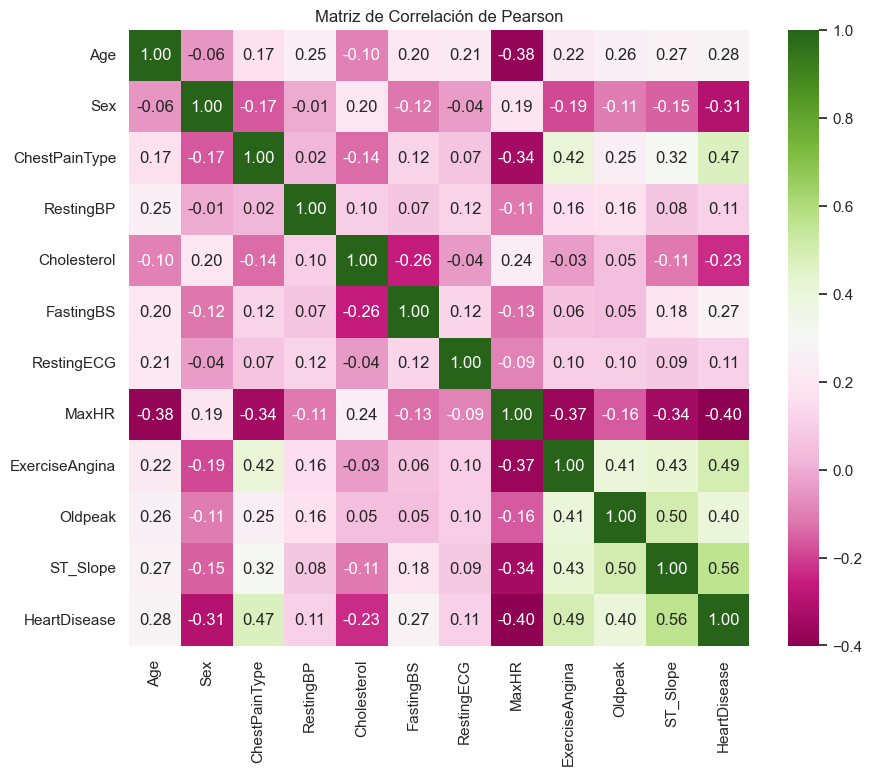

In [221]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Matriz de Correlación de Pearson')
plt.show()


En base a la matriz de correlación obtenida se pueden hacer las siguientes observaciones:

1. **Edad (Age) y Frecuencia Cardíaca Máxima Alcanzada (MaxHR):**
   - Existe una correlación negativa moderada de -0.38 entre la edad y la frecuencia cardíaca máxima alcanzada. Esto sugiere que, en general, a medida que la edad aumenta, la frecuencia cardíaca máxima tiende a disminuir.

2. **Tipo de Dolor Torácico (ChestPainType) y Enfermedad Cardíaca (HeartDisease):**
   - Hay una correlación positiva significativa de 0.47 entre el tipo de dolor torácico y la presencia de enfermedad cardíaca. Esto indica que ciertos tipos de dolor torácico pueden estar asociados con un mayor riesgo de enfermedad cardíaca.

3. **Frecuencia Cardíaca Máxima Alcanzada (MaxHR) y Angina Inducida por el Ejercicio (ExerciseAngina):**
   - Existe una correlación negativa moderada de -0.37 entre la frecuencia cardíaca máxima alcanzada y la presencia de angina inducida por el ejercicio. Esto sugiere que, en general, aquellos con frecuencias cardíacas máximas más bajas son más propensos a experimentar angina durante el ejercicio.

4. **Depresión del Segmento ST (Oldpeak) y Pendiente del Segmento ST (ST_Slope):**
   - Hay una correlación positiva fuerte de 0.50 entre la depresión del segmento ST y la pendiente del segmento ST durante el ejercicio. Esto indica que mayores niveles de depresión del segmento ST están asociados con una pendiente ST más pronunciada durante el ejercicio.

5. **Género (Sex) y Enfermedad Cardíaca (HeartDisease):**
   - La variable binaria de género (Sex) muestra una correlación negativa de -0.31 con la presencia de enfermedad cardíaca. Esto sugiere que, en este conjunto de datos, las mujeres tienden a tener una menor probabilidad de enfermedad cardíaca en comparación con los hombres.

6. **Colesterol y Nivel de Azúcar en Sangre en Ayunas (FastingBS):**
   - Hay una correlación negativa moderada de -0.26 entre el colesterol y el nivel de azúcar en sangre en ayunas. Esto indica que, en general, a medida que el colesterol aumenta, el nivel de azúcar en sangre en ayunas tiende a disminuir.

Estas observaciones proporcionan información sobre las relaciones lineales entre diferentes variables en el conjunto de datos, pero es importante recordar que la correlación no implica causalidad y que otras variables y factores pueden influir en estas relaciones.

### **6. Observaciones importantes sobre las gráficas generadas**
Se han realizado observaciones clave sobre las visualizaciones, resaltando patrones, tendencias o comportamientos notables en el conjunto de datos. Estas observaciones están detalladas en cada uno de los gráficos y se repasan a continuación:

> #### **1 Histograma: Distribución de la Edad (Age) según la Enfermedad Cardíaca (HeartDisease)**
>> Se creó un histograma que mostró la distribución de las edades para ambos valores de salida de enfermedad cardíaca (1: Diagnóstico Positivo, 0: Diagnóstico Negativo). La visualización reveló que a partir de aproximadamente los 55 años, la cantidad de personas con enfermedades cardíacas era significativamente mayor, sugiriendo una asociación entre la edad y la incidencia de enfermedades cardíacas.

> #### **2 Gráfico de Dispersión: Relación entre Edad (Age) y Frecuencia Cardíaca Máxima (MaxHR)**
>> El gráfico de dispersión mostró una tendencia donde, a medida que la edad aumentaba, la frecuencia cardíaca máxima tendía a concentrarse en rangos más bajos. Esto sugirió que, a medida que las personas envejecen, es posible que experimenten una disminución en la frecuencia cardíaca máxima durante actividades físicas.

> #### **3 Boxplot: Distribución del Colesterol (Cholesterol) según el Tipo de Dolor Torácico (ChestPainType)**
>> Este boxplot proporcionó una visión detallada de la distribución del colesterol para diferentes tipos de dolor torácico. Se observaron patrones específicos para cada categoría de dolor torácico, destacando variaciones notables en los niveles de colesterol.

> #### **4 Gráfico de Línea Polar: Comparación de Características para Pacientes con y sin Enfermedad Cardíaca (HeartDisease)**
>> Este gráfico de línea polar comparó las características promedio entre pacientes con (1) y sin (0) enfermedad cardíaca. Se destacó que la mayoría de los pacientes con enfermedad cardíaca positiva presentaban características específicas, como género masculino, ciertos tipos de dolor torácico, presión arterial en reposo específica, y otros.

> #### **5 Gráficos de Barras: Distribución de Variables Relevantes**
>> Estos gráficos de barras ofrecieron una visión detallada de la distribución de variables clave en el conjunto de datos:
>>> 1. **Angina Inducida por el Ejercicio (ExerciseAngina):** Aproximadamente 380 pacientes mostraron resultados positivos para la angina inducida por el ejercicio.
>>> 2. **Pendiente del Segmento ST (ST_Slope):** Distribución de aproximadamente 'Up': 400, 'Flat': 480, 'Down': 40.
>>> 3. **Tipo de Dolor Torácico (ChestPainType):** Distribución aproximada: 'TA': 50, 'ATA': 150, 'NAP': 200, 'ASY': 500.
>>> 4. **Resultados del Electrocardiograma en Reposo (RestingECG):** Distribución aproximada: 'Normal': 570, 'LVH': 180, 'ST': 170.

>> Estos gráficos proporcionaron una representación visual clara de la frecuencia de diferentes categorías en cada variable, facilitando la comprensión de la distribución de las características en el conjunto de datos.

### **7. Conclusión sobre el conjunto de datos analizado.**

Basándonos en las observaciones y análisis realizados en el conjunto de datos, podemos extraer algunas conclusiones:

1. **Edad y Enfermedad Cardíaca:**
   - Hay una tendencia notable en la que la presencia de enfermedad cardíaca tiende a aumentar a partir de aproximadamente los 55 años. Esto sugiere que la edad puede ser un factor de riesgo significativo para el desarrollo de enfermedades cardíacas.

2. **Relación Entre Tipo de Dolor Torácico y Enfermedad Cardíaca:**
   - La variable 'ChestPainType' (Tipo de Dolor Torácico) muestra una correlación significativa con la presencia de enfermedad cardíaca. Esto indica que el tipo de dolor torácico puede ser un indicador relevante para evaluar el riesgo de enfermedad cardíaca.

3. **Frecuencia Cardíaca Máxima y Angina Inducida por el Ejercicio:**
   - La frecuencia cardíaca máxima alcanzada durante el ejercicio está correlacionada con la presencia de angina inducida por el ejercicio. Esto sugiere que la respuesta cardíaca al ejercicio puede estar relacionada con la angina.

4. **Depresión del Segmento ST y Pendiente del Segmento ST:**
   - La depresión del segmento ST está fuertemente correlacionada con la pendiente del segmento ST durante el ejercicio. Esto indica que cambios específicos en el electrocardiograma durante el ejercicio pueden proporcionar información importante sobre la salud cardíaca.

5. **Género y Enfermedad Cardíaca:**
   - En este conjunto de datos, hay una correlación negativa entre el género y la enfermedad cardíaca, sugiriendo que las mujeres tienden a tener una menor probabilidad de enfermedad cardíaca en comparación con los hombres.

6. **Colesterol y Nivel de Azúcar en Sangre en Ayunas:**
   - Existe una correlación negativa moderada entre el colesterol y el nivel de azúcar en sangre en ayunas. Esto sugiere que los niveles de colesterol y azúcar en sangre pueden tener una relación inversa en el conjunto de datos.

Estas conclusiones proporcionan una comprensión inicial de las posibles relaciones entre diferentes variables y la presencia de enfermedades cardíacas en el conjunto de datos. 